# <font color=Maroon>PREDICT HOUSING PRICES | LINEAR REGRESSION</font>
## <font color=Blue>Area: Raleigh-Durham-Cary | Data Source: zillow.com</font>

### <font color=Black>Features Used to predict the price: </font> <font color=Green> # of Bedrooms | # of Bathrooms | Sq Footage | Age of the House

### LOADING LIBRARIES

In [1]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd


import sklearn as sk

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet


import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from matplotlib import rcParams

import pickle


In [2]:
print('Python version: %s.%s.%s' % sys.version_info[:3])
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)

Python version: 3.7.3
numpy version: 1.16.2
pandas version: 0.24.2
scikit-learn version: 0.20.3


### LOADING DATA

In [3]:
#loading data
data_file = "./Resources/Zillow_data_20191023_(Raleigh Durham Cary).csv"
data = pd.read_csv(data_file)
data.head()


,@id,@name,@type,FIPScounty,bathrooms,bedrooms,city,finishedSqFt,lastSoldDate,lastSoldPrice,...,street,taxAssessment,taxAssessmentYear,totalRooms,useCode,yearBuilt,zestimate,zindexValue,zipcode,zpid
0,270325,Southeast Raleigh,neighborhood,37183.0,3.0,3.0,Raleigh,1618.0,4/2/2019,19000.0,...,3915 Alder Grove Ln,28000.0,2018.0,NaN,SingleFamily,2019.0,NaN,"149,300",27610,79886745
1,54047,Raleigh,city,37183.0,3.0,4.0,Raleigh,2537.0,NaN,NaN,...,3207 Britmass Dr,40000.0,2018.0,NaN,SingleFamily,2019.0,NaN,"221,100",27616,215491685
2,343869,Northeast Raleigh,neighborhood,37183.0,3.0,4.0,Raleigh,1773.0,12/1/1989,102500.0,...,2004 Carthage Cir,159269.0,2018.0,7.0,SingleFamily,1989.0,224901.0,"171,900",27604,6504197
3,54047,Raleigh,city,37183.0,4.0,3.0,Raleigh,4617.0,5/16/2003,575000.0,...,9924 Waterview Rd,618168.0,2018.0,12.0,SingleFamily,1994.0,869696.0,"221,100",27615,6483992
4,270318,North Raleigh,neighborhood,37183.0,3.0,4.0,Raleigh,3066.0,5/27/2004,364000.0,...,2047 Hornbeck Ct,435002.0,2018.0,14.0,SingleFamily,2003.0,469902.0,"270,100",27614,65332699


In [4]:
data.rename(columns={'@id':'id','@name':'region','@type':'locality'}, 
                 inplace=True)
data.head()

,id,region,locality,FIPScounty,bathrooms,bedrooms,city,finishedSqFt,lastSoldDate,lastSoldPrice,...,street,taxAssessment,taxAssessmentYear,totalRooms,useCode,yearBuilt,zestimate,zindexValue,zipcode,zpid
0,270325,Southeast Raleigh,neighborhood,37183.0,3.0,3.0,Raleigh,1618.0,4/2/2019,19000.0,...,3915 Alder Grove Ln,28000.0,2018.0,NaN,SingleFamily,2019.0,NaN,"149,300",27610,79886745
1,54047,Raleigh,city,37183.0,3.0,4.0,Raleigh,2537.0,NaN,NaN,...,3207 Britmass Dr,40000.0,2018.0,NaN,SingleFamily,2019.0,NaN,"221,100",27616,215491685
2,343869,Northeast Raleigh,neighborhood,37183.0,3.0,4.0,Raleigh,1773.0,12/1/1989,102500.0,...,2004 Carthage Cir,159269.0,2018.0,7.0,SingleFamily,1989.0,224901.0,"171,900",27604,6504197
3,54047,Raleigh,city,37183.0,4.0,3.0,Raleigh,4617.0,5/16/2003,575000.0,...,9924 Waterview Rd,618168.0,2018.0,12.0,SingleFamily,1994.0,869696.0,"221,100",27615,6483992
4,270318,North Raleigh,neighborhood,37183.0,3.0,4.0,Raleigh,3066.0,5/27/2004,364000.0,...,2047 Hornbeck Ct,435002.0,2018.0,14.0,SingleFamily,2003.0,469902.0,"270,100",27614,65332699


#### Drop unwanted columns to retain only the relevant features

In [5]:
rdc_data =data.drop(columns=['links','FIPScounty','useCode','id','zindexValue','zpid','street','state','region','city','lastSoldDate'])
rdc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 14 columns):
locality             1683 non-null object
bathrooms            1673 non-null float64
bedrooms             1672 non-null float64
finishedSqFt         1679 non-null float64
lastSoldPrice        1286 non-null float64
latitude             1683 non-null float64
longitude            1683 non-null float64
lotSizeSqFt          1555 non-null float64
taxAssessment        1449 non-null float64
taxAssessmentYear    1454 non-null float64
totalRooms           1013 non-null float64
yearBuilt            1601 non-null float64
zestimate            1594 non-null float64
zipcode              1683 non-null int64
dtypes: float64(12), int64(1), object(1)
memory usage: 184.2+ KB


In [6]:
#drop records with blank zestimate value
rdc_data['zestimate'].replace('', np.nan, inplace=True)
rdc_data.info()
rdc_data.dropna(subset=['zestimate'], inplace=True)
rdc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 14 columns):
locality             1683 non-null object
bathrooms            1673 non-null float64
bedrooms             1672 non-null float64
finishedSqFt         1679 non-null float64
lastSoldPrice        1286 non-null float64
latitude             1683 non-null float64
longitude            1683 non-null float64
lotSizeSqFt          1555 non-null float64
taxAssessment        1449 non-null float64
taxAssessmentYear    1454 non-null float64
totalRooms           1013 non-null float64
yearBuilt            1601 non-null float64
zestimate            1594 non-null float64
zipcode              1683 non-null int64
dtypes: float64(12), int64(1), object(1)
memory usage: 184.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1594 entries, 2 to 1682
Data columns (total 14 columns):
locality             1594 non-null object
bathrooms            1589 non-null float64
bedrooms             1589 non-null fl

In [7]:
rdc_data.head()

,locality,bathrooms,bedrooms,finishedSqFt,lastSoldPrice,latitude,longitude,lotSizeSqFt,taxAssessment,taxAssessmentYear,totalRooms,yearBuilt,zestimate,zipcode
2,neighborhood,3.0,4.0,1773.0,102500.0,35.807071,-78.580896,8276.0,159269.0,2018.0,7.0,1989.0,224901.0,27604
3,city,4.0,3.0,4617.0,575000.0,35.919808,-78.656643,223027.0,618168.0,2018.0,12.0,1994.0,869696.0,27615
4,neighborhood,3.0,4.0,3066.0,364000.0,35.927906,-78.573316,6534.0,435002.0,2018.0,14.0,2003.0,469902.0,27614
5,neighborhood,3.0,4.0,2979.0,381500.0,35.782637,-78.710919,29185.0,343669.0,2018.0,8.0,1974.0,442602.0,27606
6,neighborhood,4.0,4.0,4977.0,665000.0,35.895335,-78.628509,27878.0,673517.0,2018.0,8.0,1997.0,760869.0,27615


In [8]:
#calculating age of the house from year built
rdc_data['age']=2019-rdc_data['yearBuilt']
rdc_data.head()

,locality,bathrooms,bedrooms,finishedSqFt,lastSoldPrice,latitude,longitude,lotSizeSqFt,taxAssessment,taxAssessmentYear,totalRooms,yearBuilt,zestimate,zipcode,age
2,neighborhood,3.0,4.0,1773.0,102500.0,35.807071,-78.580896,8276.0,159269.0,2018.0,7.0,1989.0,224901.0,27604,30.0
3,city,4.0,3.0,4617.0,575000.0,35.919808,-78.656643,223027.0,618168.0,2018.0,12.0,1994.0,869696.0,27615,25.0
4,neighborhood,3.0,4.0,3066.0,364000.0,35.927906,-78.573316,6534.0,435002.0,2018.0,14.0,2003.0,469902.0,27614,16.0
5,neighborhood,3.0,4.0,2979.0,381500.0,35.782637,-78.710919,29185.0,343669.0,2018.0,8.0,1974.0,442602.0,27606,45.0
6,neighborhood,4.0,4.0,4977.0,665000.0,35.895335,-78.628509,27878.0,673517.0,2018.0,8.0,1997.0,760869.0,27615,22.0


In [9]:
#final dataframe using only the required features
final_df = rdc_data[['bathrooms','bedrooms','finishedSqFt','age','zestimate']]
final_df.dropna(inplace=True)

C:\Users\Rima\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1510 entries, 2 to 1682
Data columns (total 5 columns):
bathrooms       1510 non-null float64
bedrooms        1510 non-null float64
finishedSqFt    1510 non-null float64
age             1510 non-null float64
zestimate       1510 non-null float64
dtypes: float64(5)
memory usage: 70.8 KB


### Assigning X (data) & Y(target)

In [11]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = final_df[['bathrooms','bedrooms','finishedSqFt','age']]
y = final_df["zestimate"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(1510, 4) (1510, 1)


### Split Data into Train & Test

In [12]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

### CREATING MODEL | LINEAR REGRESSION

In [13]:
# Create a LinearRegression model and fit it to the scaled training data
print(X_train)
### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
### END SOLUTION

      bathrooms  bedrooms  finishedSqFt    age
1282        3.0       4.0        2348.0    0.0
1406        3.5       5.0        3025.0    0.0
1306        3.0       4.0        2751.0    0.0
1351        5.0       5.0        5451.0    3.0
1670        2.5       3.0        1500.0   27.0
1659        3.0       3.0        2592.0   19.0
788         2.0       3.0        1607.0   37.0
208         6.0       5.0        5238.0    6.0
589         3.0       4.0        3058.0    0.0
1400        4.0       4.0        3416.0   27.0
1239        2.0       2.0        1206.0   94.0
1243        2.0       3.0        2141.0   71.0
919         3.0       3.0        2863.0   18.0
409         2.5       3.0        1615.0   22.0
1321        4.0       6.0        3637.0   23.0
1494        3.0       4.0        2024.0   52.0
388         3.0       3.0        2780.0   51.0
1612        3.0       4.0        2888.0   25.0
575         3.0       5.0        3628.0   54.0
727         3.0       3.0        2294.0   11.0
1052        1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### ACCURACY

In [14]:
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")


Training Score: 0.7283697247663414
Testing Score: 0.7298281009179494


### RESIDUAL PLOT

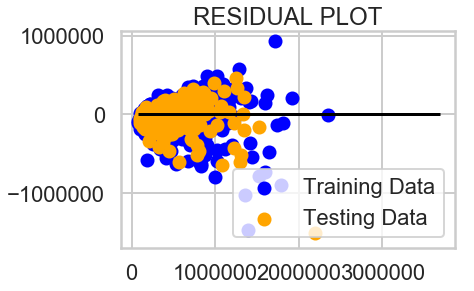

In [15]:
# Make predictions using the X_test data
# Plot y_test_scaled vs y_test
# Scatter plot y_test vs predictions
from pylab import rcParams

### BEGIN SOLUTION
predictions = model.predict(X_test)
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("RESIDUAL PLOT")

rcParams['figure.figsize'] = 25, 15

plt.savefig('Images/ResidualPlot.png')
plt.show()
### END SOLUTION

In [16]:
#Predictions
predictions

array([[ 305797.15954404],
       [ 501704.1894746 ],
       [ 279787.3350812 ],
       [ 293213.00181298],
       [ 411237.69923845],
       [ 101014.11316781],
       [ 318183.65931557],
       [ 481112.75385143],
       [ 470484.77946405],
       [ 411281.61038263],
       [ 297149.90790816],
       [ 442379.25081315],
       [ 272839.69505426],
       [ 721919.06462252],
       [ 402519.50811046],
       [ 622486.07691976],
       [ 278011.38611095],
       [ 674192.31445632],
       [ 553289.70811079],
       [ 389003.37985385],
       [ 395902.22975117],
       [ 318506.93465702],
       [ 740530.57556728],
       [ 454569.33451032],
       [ 691836.50072623],
       [ 663874.38163077],
       [ 436124.98154241],
       [ 324917.07868522],
       [ 459625.02244359],
       [ 686114.86796489],
       [ 336208.26585073],
       [1255485.92894443],
       [ 157819.02331845],
       [ 226122.27446179],
       [ 813618.1100706 ],
       [ 670102.03254319],
       [ 392214.55937069],
 

In [17]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
### END SOLUTION



print(f"Linear Regression MSE: {MSE}, R2: {r2}")

Linear Regression MSE: 27836442793.19117, R2: 0.7298281009179494


In [18]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train, y_train)

predictions = lasso.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = lasso.score(X_test, y_test)
### END SOLUTION

print(f"Lasso Model MSE: {MSE}, R2: {r2}")

Lasso Model MSE: 27836442515.040195, R2: 0.7298281036175966


In [19]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train, y_train)

predictions = ridge.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = ridge.score(X_test, y_test)
### END SOLUTION

print(f"Ridge Model MSE: {MSE}, R2: {r2}")

Ridge Model MSE: 27836424853.01634, R2: 0.7298282750397342


In [20]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train, y_train)

predictions = elasticnet.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = elasticnet.score(X_test, y_test)
### END SOLUTION
print(f"ElasticNet Model MSE: {MSE}, R2: {r2}")


ElasticNet Model MSE: 27826985597.010002, R2: 0.7299198895373229


### Saving the model

In [162]:
pkl_filename = "LinearRegression.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)